# Tri-box clustering of Job Offerings data

In [29]:
# get the data from file
import pandas as pd
import re
data = pd.read_csv('data_for_clustering.csv',encoding='utf8',index_col=None)
data= data.drop('Unnamed: 0',axis=1)
data.head(5)

,domain_id,domain_name,profearea_id,profearea_name,ad_id,name,requirements,responsibilities,conditions,req_refined,req_idxs,resp_refined,resp_idxs,cond_refined,cond_idxs
0,1,"Информационные технологии, интернет, телеком",1.395,Банковское ПО,35549307,Директор проектов (Лаборатория технологий омни...,Опыт работы не менее 5 лет в руководящей позиц...,Управление проектами в области цифровых канало...,Место работы: м. Киевская \nГрафик работы 5/2 ...,['управление проектами ' 'управление ' 'програ...,"(array([ 20, 21, 50, 58, 70, 103, 135, 137...",['ответственность ' 'сопровождение ' 'управлен...,"(array([ 4, 18, 46, 101]),)",['профессиональное развитие ' 'профессиональна...,"(array([ 8, 9, 14, 17, 19, 36, 39, 44, 56, 59..."
1,1,"Информационные технологии, интернет, телеком",1.327,Управление проектами,35549307,Директор проектов (Лаборатория технологий омни...,Опыт работы не менее 5 лет в руководящей позиц...,Управление проектами в области цифровых канало...,Место работы: м. Киевская \nГрафик работы 5/2 ...,['управление проектами ' 'управление ' 'програ...,"(array([ 20, 21, 50, 58, 70, 103, 135, 137...",['ответственность ' 'сопровождение ' 'управлен...,"(array([ 4, 18, 46, 101]),)",['профессиональное развитие ' 'профессиональна...,"(array([ 8, 9, 14, 17, 19, 36, 39, 44, 56, 59..."
2,1,"Информационные технологии, интернет, телеком",1.395,Банковское ПО,35966411,Начальник отдела стратегических проектов и тех...,Умение логически выстраивать бизнес-процессы;...,Инициирование новых доработок (подготовка бизн...,Социальный пакет с расширенным ДМС со стоматол...,['высшее техническое математическое экономичес...,"(array([ 0, 15, 88, 95, 123, 131, 138]),)",['функциональное тестирование ' 'оптимизация с...,"(array([ 7, 8, 9, 10, 17, 20, 31, 35...",['корпоративная библиотека ' 'социальный пакет...,"(array([16, 62, 67, 74]),)"
3,1,"Информационные технологии, интернет, телеком",1.395,Банковское ПО,36012308,Project Manager (Digital),Высшее техническое или высшее экономическое об...,Реализация проектов по созданию digital-процес...,"Профессиональное обучение, семинары, тренинги,...",['высшее техническое математическое экономичес...,"(array([ 0, 16, 17, 19, 35, 45, 95, 96...",['телекоммуникации ' 'оптимизация бизнес-проце...,"(array([ 12, 17, 20, 26, 27, 31, 36, 39...",['участие в крупных проектах ' 'обучение ' 'пр...,"(array([ 5, 6, 8, 9, 10, 14, 17, 21, 34, 46..."
4,1,"Информационные технологии, интернет, телеком",1.221,"Программирование, Разработка",36012308,Project Manager (Digital),Высшее техническое или высшее экономическое об...,Реализация проектов по созданию digital-процес...,"Профессиональное обучение, семинары, тренинги,...",['высшее техническое математическое экономичес...,"(array([ 0, 16, 17, 19, 35, 45, 95, 96...",['телекоммуникации ' 'оптимизация бизнес-проце...,"(array([ 12, 17, 20, 26, 27, 31, 36, 39...",['участие в крупных проектах ' 'обучение ' 'пр...,"(array([ 5, 6, 8, 9, 10, 14, 17, 21, 34, 46..."


## 1.Считаем файлы выделенных фраз

In [30]:
# read lists of requirements,responsibiliries, conditions from files
f = open('resp_picked_clean.txt', 'r')
resp_picked = f.readlines()
f.close()
f = open('req_picked_clean.txt', 'r')
req_picked = f.readlines()
f.close()
f = open('cond_picked_clean.txt', 'r')
cond_picked = f.readlines()
f.close()

In [31]:
# n - length of requirements list
n = len(req_picked)
# m - length of responsibilities list
m = len(resp_picked)
# l - length of conditions list
l = len(cond_picked)

## 2.Посчитаем веса вакансий

In [32]:
weights = data[['ad_id','resp_idxs','req_idxs','cond_idxs']].drop_duplicates()

# weight of vacancy is an average sum of number of extracted requirements, responsibilities, conditions
w =[]
for el in weights.values:
    temp = round((len(re.findall("\d+", el[1]))+len(re.findall("\d+", el[2]))+len(re.findall("\d+", el[3])))/3.0)
    w.append(temp)

In [33]:
data_no_duplicates = data[['ad_id','req_idxs','resp_idxs','cond_idxs']].drop_duplicates()

## 3.Построим 3х входовую матрицу

In [79]:
# get the lists of indexes of requirements, rsponsibilities and conditions of dataframe
reqs = []
resps = []
conds = []
for el in data_no_duplicates.values:
    req = re.findall("\d+", el[1])
    resp = re.findall("\d+", el[2])
    cond = re.findall("\d+", el[3])
    reqs.append(req)
    resps.append(resp)
    conds.append(cond)

In [80]:
# build a 3d matrix
import numpy as np
res= np.zeros((n,m,l), dtype=float)
for i in range(len(w)):
    temp= np.zeros((n,m,l), dtype=float)
    for el in reqs[i]:
        for el2 in resps[i]:
            for el3 in conds[i]:
                
                # if combination (el,el2,el3) is in vacancy's (requirements, responsibilities, conditions), 
                # then add 1 to the (el,el2,el3)-th element of 3d matrix
                temp[int(el)][int(el2)][int(el3)]+=1.0
    # after we iterated over all requirements, responsibilities, conditions sets of a vacancy, 
    # add this 3d adjacency matrix to the r-matrix, but divide by the weight of the vacancy
    # Divide - because the larger the weight is, the more requirements, responsibilities and conditions 
    # were exctracted
    # for the vacancy - thus it's less important and more general
    res+=temp*1.0/w[i]

res = [[[np.round(el*1.0,2) for el in el2] for el2 in el3] for el3 in res]


In [81]:
res = np.array(res)

In [82]:
## apply modularity transformation

a_ipp = np.zeros(n,dtype=float)
a_jpp = np.zeros(m,dtype=float)
a_kpp = np.zeros(l,dtype=float)
for ii in range(n):
    a_ipp[ii]=sum(sum(res[ii][:][:]))
for jj in range(m):
    a_jpp[jj]=sum(sum(res[:][jj][:]))
for kk in range(l):
    a_kpp[kk]=sum(sum(res[:][:][kk]))
    
a_ijk = np.zeros((n,m,l),dtype=float)
for ii in range(n):
    for jj in range(m):
        for kk in range(l):
            a_ijk[ii][jj][kk] = round(a_ipp[ii]*a_jpp[jj]*a_kpp[kk]*1.0/ sum_res**2,2)
            


In [83]:
res = res - a_ijk

In [84]:
print(len(res[res>0]))
print(len(res[res<0]))

268251
764839


In [85]:
# sum of all positive elements in matrix
sum_res = 0
for el in res:
    for el2 in el:
        for el3 in el2:
            if el3>0:
                sum_res+=el3

In [86]:
sum_res

63089.259999997696

In [87]:
#union of two sets
def union(lst1,lst2):
    return list(set(lst1).union(set(lst2)))

Определим функции из метода Миркина, Крамаренко

In [88]:
# sum elements of 3d matrix on V,W,U places, where V,W,U - arrays of indexes of requirements, responsibilities, conditions
def sum_VWU(V,W,U,res):
    r = 0
    for el in V:
        for el2 in W:
                for el3 in U:
                    r+=res[el][el2][el3]
    return r

# sum elements of 3d matrix on i,W,U places, where W,U - arrays of indexes of responsibilities, 
# conditions, i - i_th requirement
def sum_iWU(i,W,U,res):
    r = 0
    for el in W:
        for el2 in U:
            r+=res[i][el][el2]
    return r

# sum elements of 3d matrix on i,W,U places, where V,U - arrays of indexes of requirements, 
# conditions, j - j_th responsibility

def sum_jVU(V,j,U,res):
    r = 0
    for el in V:
        for el2 in U:
            r+=res[el][j][el2]
    return r

# sum elements of 3d matrix on V,W places, where V,W - arrays of indexes of requirements, 
# responsibilities, k - k_th condition

def sum_kVW(V,W,k,res):
    r = 0
    for el in V:
        for el2 in W:
            r+=res[el][el2][k]
    return r

## Эксперимент 1.

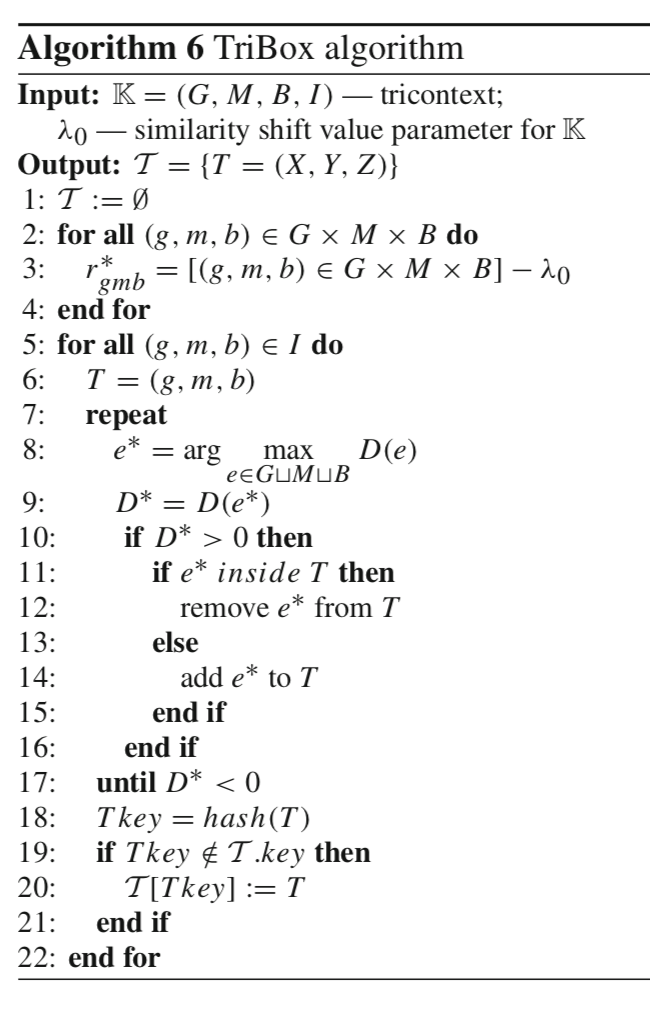
<img width="100">

Процедура D(i) из метода Миркина, Крамаренко

In [89]:
import numpy
def del_(r,V,W,U,row,col,xray):
    # length of requirements array
    n = len(r)
    # length of responsibilities array
    m = len(r[0])
    # length of rconditions array
    l = len(r[0][0])
    # nv,nw,nu - lengths of current tri-box cluster
    nv=len(V)
    nw=len(W)
    nu= len(U)
    rVWU = sum_VWU(V,W,U,r)
        
    if nw*nv*nu == 0:
        print('All sets in a box must be non-empty!')
        return val,z
    
    if len(col)*len(row)*len(xray) != 0:
        print('Either row or col or xray must be 0 at changing the box')
        return val,z
    
    if len(col) + len(row) + len(xray) == 0:
        print('Either row or col or xray must be not 0 at changing the box')
        return val,z
    
    # if row=requirement is to be added
    if len(row) > 0:
        row = row[0]
        # sr sum of elements for the row
        sr= sum_iWU(row,W,U,r)
        it= 2*sr*rVWU
        #if row is in set already, we need to delete it, so z=-1
        if row in V:
            z=- 1
        else:
            z=1
        # val - the difference at cluster data-scatter upon adding or removing row to the box
        if sr<0.0: 
            val = -1
        else:
            val=z*it + sr ** 2 - z*rVWU**2 / nv
            if nv + z == 0:
                val=- 1
            else:
                val=val / (nw*nu*(nv + z))
    else:
        # if xray=condition is to be added
        if len(xray) > 0:
            xray = xray[0]
            # sx sum of elements for the xray
            sx=sum_kVW(V,W,xray,r)
            it=2*sx*rVWU
            #if xray is in set already, we need to delete it, so z=-1
            if xray in U:
                z=- 1
            else:
                z=1
            if sx<0.0:
                val=-1
            else:# val - the difference at cluster data-scatter upon adding or removing xray to the box
                val=z*it + sx ** 2 - z*rVWU**2 / nu
                if nu + z == 0:
                    val=- 1
                else:
                    val=val / (nv*nw*(nu + z))
        else:
            # if col=responsibility is to be added
            if len(col) > 0:
                col = col[0]
                # sc sum of elements for the column
                sc=sum_jVU(V,col,U,r)
                it=2*sc*rVWU
                if col in W:
                    z=- 1
                else:
                    z=1
                if sc<0.0:
                    val = -1
                else:# val - the difference at cluster data-scatter upon adding or removing col to the box
                    val=z*it + sc ** 2 - z*rVWU**2 / nw
                    if nw + z == 0:
                        val=- 1
                    else:
                        val=val / (nv*nu*(nw + z))
            else:
                print('No col or row or xray supplied!!!')
                return val,z
    return val,z

Процедура из метода Крамаренко и Миркина, возвращает элемент с максимальным D(i)

In [90]:
def nbox(r,V,W,U):
    
    # length of requirements array
    n = len(r)
    # length of responsibilities array
    m = len(r[0])
    # length of rconditions array
    l = len(r[0][0])
    # nv,nw,nu - lengths of current tri-box cluster
    nv=len(V)
    nw=len(W)
    nu= len(U)
    
    la=sum_VWU(V,W,U,r) / (nv*nw*nu)
    cont=nv*nw*nu*la ** 2
    
    
    # find the largest delta at adding, row or col or xray
    
    row=[]
    cnr=- 1000
    for ii in range(n):
        v,z=del_(r,V,W,U,[ii],[],[])
        if v > cnr:
            cnr=v
            zr=z
            row=ii
    col=[]
    cnc=- 1000
    for jj in range(m):
        v,z=del_(r,V,W,U,[],[jj],[])
        if v > cnc:
            cnc=v
            zc=z
            col=jj
    xray=[]
    cnx=- 1000
    for kk in range(l):
        v,z=del_(r,V,W,U,[],[],[kk])
        if v > cnx:
            cnx=v
            zx=z
            xray=kk
            
    # if the largest delta is for the row          
    if cnr==max([cnc,cnr,cnx]):
        if cnr > 0:
            if zr > 0:
                Vn=union(V,[row])
            else:
                Vn = list(set(V)-set([row]))
            Wn=W
            Un=U
            dcn=cnr
        else:
            Vn=V
            Wn=W
            Un=U
            dcn=0
    else:
        # if the largest delta is for the col
        if cnc == max([cnc,cnr,cnx]):
            if cnc > 0:
                if zc > 0:
                    Wn=union(W,[col])
                    
                else:
                    Wn=list(set(W)-set([col]))
                    
                Vn=V
                Un=U
                dcn=cnc
            else:
                Vn=V
                Wn=W
                Un=U
                dcn=0
        else:
            # if the largest delta is for the xray
            if cnx == max([cnc,cnr,cnx]):
                if cnx > 0:
                    if zx > 0:
                        Un=union(U,[xray])
                    else:
                        Un=list(set(U)-set([xray]))
                    Wn=W
                    Vn=V
                    dcn=cnx
                else:
                    Vn=V
                    Wn=W
                    Un=U
                    dcn=0
    # return themodified box and contribution of adding the element to datascatter
    return Vn,Wn,Un,dcn

Процедура, формирующая трикластер: Добавляем/удаляем элементы из трикластера с максимальным D(i), пока D(i) не станет меньше нуля.

In [96]:
#v2
import numpy as np
def brc_2(r,row,col,xray):
    r = np.array(r)
    counf=0
    n = len(r)
    m = len(r[0])
    l = len(r[0][0])
    V=[row]
    W=[col]
    U=[xray]
    # average of tri-cluster
    la = sum_VWU(V,W,U,r) / (len(V)*len(W)*len(U))
    # contribution to datascatter
    co = (la ** 2)*(len(V)*len(W)*len(U))
    dd =1 
    # repeat cycle till adding an element to it makes a pisitive difference (Mirkin&Kramarenko article)
    while (dd > 0):
            
            V,W,U,dd=nbox(r,V,W,U)
            if row not in V or col not in W or xray not in U:
                return [],[],[],0,0,0
            co=co + dd
            counf=counf + 1
    # contribution - sum of curren cluster divided by the general sum of matrix r
    contribution = sum_VWU(V,W,U,r)*1.0/sum_res
    print('counf')
    print(counf)
    print('sum_VWU')
    print(sum_VWU(V,W,U,r))
    print('V')
    print(V)
    print('W')
    print(W)
    print('U')
    print(U)
    print('contribution')
    print(contribution)
    return V,W,U,la,co,contribution


In [98]:
used_V = []
used_W = []
used_U = []
clusters = []
for ii in range(n):
    for jj in range(m):
        for kk in range(l):
            if res[ii][jj][kk]>0.0 and ii not in used_V and jj not in used_W and kk not in used_U:
                # we start at a not null element in our r-maxtrix
                # we start at an element, that is not already in any cluster as clusters don't intersect
                # we get the tri-cluster
                V,W,U,la,co,contribution = brc_2(res,ii,jj,kk)
                # we check if it's in cluster set already
                temp = [set(V),set(W),set(U)]
                if temp not in clusters and len(V)>0:
                    clusters.append(temp)
                    print('new_cluster')
                    print(temp)
                    for el in V:
                        used_V.append(el)
                    for el in W:
                        used_W.append(el)
                    for el in U:
                        used_W.append(el)
    print('Working on II num + ' + str(ii))
                

counf
113
sum_VWU
24820.18999999996
V
[0, 2, 7, 9, 10, 11, 12, 13, 15, 16, 18, 19, 20, 21, 23, 25, 26, 27, 32, 36, 40, 41, 44, 45, 46, 47, 48, 49, 50, 53, 55, 57, 60, 61, 67, 69, 70, 71, 73, 75, 76, 77, 79, 82, 88, 95, 96, 97, 100, 101, 102, 105, 106, 110, 111, 112, 114, 119, 122, 123, 125, 128, 129, 135, 138]
W
[7, 8, 9, 10, 15, 16, 17, 18, 19, 20, 25, 26, 27, 32, 35, 38, 39, 40, 41, 42, 43, 46, 49, 51, 58, 63, 71, 72, 73, 75, 99, 108, 115]
U
[0, 65, 2, 3, 70, 6, 8, 9, 74, 14, 16, 33, 36, 44, 46, 59, 62]
contribution
0.3934138710772779
new_cluster
[{0, 128, 2, 129, 7, 135, 9, 10, 11, 12, 13, 138, 15, 16, 18, 19, 20, 21, 23, 25, 26, 27, 32, 36, 40, 41, 44, 45, 46, 47, 48, 49, 50, 53, 55, 57, 60, 61, 67, 69, 70, 71, 73, 75, 76, 77, 79, 82, 88, 95, 96, 97, 100, 101, 102, 105, 106, 110, 111, 112, 114, 119, 122, 123, 125}, {7, 8, 9, 10, 15, 16, 17, 18, 19, 20, 25, 26, 27, 32, 35, 38, 39, 40, 41, 42, 43, 46, 49, 51, 58, 63, 71, 72, 73, 75, 99, 108, 115}, {0, 65, 2, 3, 33, 36, 70, 6, 8, 9, 7

In [99]:
tri_clusters_df_v1 = pd.DataFrame(columns = ['Requirements','Responsibilities',
                              'Conditions'])
for i in range(len(clusters)):
    tri_clusters_df_v1 = tri_clusters_df_v1.append({'Requirements':[req_picked[el].replace('\n','') for el in clusters[i][0]],
                                                'Responsibilities':[resp_picked[el].replace('\n','') for el in clusters[i][1]],
                                               'Conditions':[cond_picked[el].replace('\n','') for el in clusters[i][2]]}, ignore_index = True)
        

In [100]:
tri_clusters_df_v1.head()

,Requirements,Responsibilities,Conditions
0,[Высшее техническое математическое экономическ...,"[Функциональное тестирование, Оптимизация сист...","[Оформление по тк, Премии, Льготное кредитован..."
1,"[Стрессоустойчивость, Коммуникабельность, Целе...","[Техническое задание, Проектирование высоконаг...","[Возможность влиять, Обучение, Финансирование ..."
2,"[Организация взаимодействия, Знание методологи...",[Микросервисная архитектура],[Опыт работы]


In [101]:
tri_clusters_df_v1.to_csv('tri-clusters_v1.csv')

## Эксперимент 2. Адаптированная версия метода Tribox

### Отличие от алгоритма в Эксперименте 1 в том, что после того как условие, требование или обязанность, попадают в кластер, они удаляются из матрицы, так как кластеры не могут пересекаться. Такой код работает примерно 5-10 минут, в отличие от кода из эксперимента 1, который работает 20 часов.

In [42]:
import numpy
def del_(r,V,W,U,row,col,xray):
    # length of requirements array
    n = len(r)
    # length of responsibilities array
    m = len(r[0])
    # length of rconditions array
    l = len(r[0][0])
    # nv,nw,nu - lengths of current tri-box cluster
    nv=len(V)
    nw=len(W)
    nu= len(U)
    rVWU = sum_VWU(V,W,U,r)
        
    if nw*nv*nu == 0:
        print('All sets in a box must be non-empty!')
        return val,z
    
    if len(col)*len(row)*len(xray) != 0:
        print('Either row or col or xray must be 0 at changing the box')
        return val,z
    
    if len(col) + len(row) + len(xray) == 0:
        print('Either row or col or xray must be not 0 at changing the box')
        return val,z
    
    # if row=requirement is to be added
    if len(row) > 0:
        row = row[0]
        # sr sum of elements for the row
        sr= sum_iWU(row,W,U,r)
        it= 2*sr*rVWU
        #if row is in set already, we need to delete it, so z=-1
        if row in V:
            z=- 1
        else:
            z=1
        # val - the difference at cluster data-scatter upon adding or removing row to the box
        if sr<0.0: 
            val = -1
        else:
            val=z*it + sr ** 2 - z*rVWU**2 / nv
            if nv + z == 0:
                val=- 1
            else:
                val=val / (nw*nu*(nv + z))
    else:
        # if xray=condition is to be added
        if len(xray) > 0:
            xray = xray[0]
            # sx sum of elements for the xray
            sx=sum_kVW(V,W,xray,r)
            it=2*sx*rVWU
            #if xray is in set already, we need to delete it, so z=-1
            if xray in U:
                z=- 1
            else:
                z=1
            if sx<0.0:
                val=-1
            else:# val - the difference at cluster data-scatter upon adding or removing xray to the box
                val=z*it + sx ** 2 - z*rVWU**2 / nu
                if nu + z == 0:
                    val=- 1
                else:
                    val=val / (nv*nw*(nu + z))
        else:
            # if col=responsibility is to be added
            if len(col) > 0:
                col = col[0]
                # sc sum of elements for the column
                sc=sum_jVU(V,col,U,r)
                it=2*sc*rVWU
                if col in W:
                    z=- 1
                else:
                    z=1
                if sc<0.0:
                    val = -1
                else:# val - the difference at cluster data-scatter upon adding or removing col to the box
                    val=z*it + sc ** 2 - z*rVWU**2 / nw
                    if nw + z == 0:
                        val=- 1
                    else:
                        val=val / (nv*nu*(nw + z))
            else:
                print('No col or row or xray supplied!!!')
                return val,z
    return val,z

Процедура из метода Крамаренко и Миркина, возвращает элемент с максимальным D(i)

In [20]:
def nbox(r,V,W,U):
    
    # length of requirements array
    n = len(r)
    # length of responsibilities array
    m = len(r[0])
    # length of rconditions array
    l = len(r[0][0])
    # nv,nw,nu - lengths of current tri-box cluster
    nv=len(V)
    nw=len(W)
    nu= len(U)
    
    la=sum_VWU(V,W,U,r) / (nv*nw*nu)
    cont=nv*nw*nu*la ** 2
    
    
    # find the largest delta at adding, row or col or xray
    
    row=[]
    cnr=- 1000
    for ii in range(n):
        v,z=del_(r,V,W,U,[ii],[],[])
        if v > cnr:
            cnr=v
            zr=z
            row=ii
    col=[]
    cnc=- 1000
    for jj in range(m):
        v,z=del_(r,V,W,U,[],[jj],[])
        if v > cnc:
            cnc=v
            zc=z
            col=jj
    xray=[]
    cnx=- 1000
    for kk in range(l):
        v,z=del_(r,V,W,U,[],[],[kk])
        if v > cnx:
            cnx=v
            zx=z
            xray=kk
            
    # if the largest delta is for the row          
    if cnr==max([cnc,cnr,cnx]):
        if cnr > 0:
            if zr > 0:
                Vn=union(V,[row])
            else:
                Vn = list(set(V)-set([row]))
            Wn=W
            Un=U
            dcn=cnr
        else:
            Vn=V
            Wn=W
            Un=U
            dcn=0
    else:
        # if the largest delta is for the col
        if cnc == max([cnc,cnr,cnx]):
            if cnc > 0:
                if zc > 0:
                    Wn=union(W,[col])
                    
                else:
                    Wn=list(set(W)-set([col]))
                    
                Vn=V
                Un=U
                dcn=cnc
            else:
                Vn=V
                Wn=W
                Un=U
                dcn=0
        else:
            # if the largest delta is for the xray
            if cnx == max([cnc,cnr,cnx]):
                if cnx > 0:
                    if zx > 0:
                        Un=union(U,[xray])
                    else:
                        Un=list(set(U)-set([xray]))
                    Wn=W
                    Vn=V
                    dcn=cnx
                else:
                    Vn=V
                    Wn=W
                    Un=U
                    dcn=0
    # return themodified box and contribution of adding the element to datascatter
    return Vn,Wn,Un,dcn

In [43]:
np.where(res[0][0][:]>0.0)

(array([ 6,  8, 14, 22, 24, 56, 58, 62, 63]),)

In [44]:
import numpy as np
def brc(r,row,col,xray):
    counf=0
    n = len(r)
    m = len(r[0])
    l = len(r[0][0])
    r = np.array(r)
    ff=0
    
    if len(row) > 0:
        V=row
        row = int(row[0])
        try:
            temp = np.where(r[row][:][:]>0.0)
            W = [temp[0][0]]
            try:
                U= [temp[1][0]]
            except:
                ff=1
                return V,W,[],0,0,0
        except:
            ff=1
            return V,[],[],0,0,0
        
    if ff==0:
        # la = the average of tricluster
        la=sum_VWU(V,W,U,r) / (len(V)*len(W)*len(U))
        co=(la ** 2)*(len(V)*len(W)*len(U))
        dd=1
        while (dd > 0):
            V,W,U,dd=nbox(r,V,W,U)
            co=co + dd
            counf=counf + 1
            if counf%20==0:
                print('dd')
                print(dd)
                print('counf')
                print(counf)
                print('sum_VWU')
                print(sum_VWU(V,W,U,r))
                print('V')
                print(V)
                print('W')
                print(W)
                print('U')
                print(U)
            if counf>=1000:
                print('no hope')
                break
    contribution_to_sum = sum_VWU(V,W,U,r)*1.0/sum_res
    return V,W,U,la,co,contribution_to_sum

In [ ]:
V=[]
W=[]
U = []
clusters_V=[]
clusters_W=[]
clusters_U=[]
la=0
co=0
temp_cond_picked = cond_picked
temp_req_picked = req_picked
temp_resp_picked = resp_picked
temp_res = res.copy()
bi_clusters_df = pd.DataFrame(columns = ['Requirements','Responsibilities',
                              'Conditions'])
i = 0
c_gen=0
while len(temp_cond_picked)*len(temp_req_picked)!=0:
    V=[]
    W=[]
    U = []
    print(len(temp_res))
    print(len(temp_res[0]))
    print(len(temp_res[0][0]))
    V,W,U,la,co,cont_percent = brc(temp_res,[0],[],[])
    if len(W)==0 or len(U) == 0:
        temp_res = np.delete(temp_res,0, axis=0)
        temp_req_picked = np.delete(temp_req_picked, 0)   
        print('empty cluster')
        print('contribution')
        print(cont_percent)
        c_gen+=cont_percent

    else:
        print('Contribution of cluster '+ str(round(cont_percent,4)))
        clusters_V.append(V)
        clusters_W.append(W)
        clusters_U.append(U)
        bi_clusters_df = bi_clusters_df.append({'Requirements':[temp_req_picked[el].replace('\n','') for el in clusters_V[i]],
                                                'Responsibilities':[temp_resp_picked[el].replace('\n','') for el in clusters_W[i]],
                                               'Conditions':[temp_cond_picked[el].replace('\n','') for el in clusters_U[i]]}, ignore_index = True)
        temp_res = np.delete(np.delete(np.delete(temp_res, U,axis =2), W,axis =1),V, axis=0)
        temp_req_picked = np.delete(temp_req_picked, V)
        temp_resp_picked = np.delete(temp_resp_picked, W)
        temp_cond_picked = np.delete(temp_cond_picked, U)
        c_gen+=cont_percent
        i+=1

In [49]:
bi_clusters_df

,Requirements,Responsibilities,Conditions
0,[Высшее техническое математическое экономическ...,"[Функциональное тестирование, Оптимизация сист...","[Оформление по тк, Официальное трудоустройство..."
1,"[Стрессоустойчивость, Клиенториентированность,...","[Презентации, Результат, Отчетность, Ответстве...","[Программы лояльности, Дружный коллектив, Отпу..."
2,[Дисциплинированность],[Терминалы],"[Карьерный рост, Своевременная оплата, Доход п..."
3,[Написание unit-тестов],"[Коммуникабельность, JavaScript, Desktop-прило...","[Современные инструменты, Гибкий график, Совре..."
4,"[Целеустремленность, Продажи]","[Банки, Финансовые модели]","[Английский, Сертификация, Дисконт-программы]"
5,[IOT продукты],[Стратегия],"[Конкурентоспособная зарплата, Амбициозные зад..."
6,[Restapi],"[Структуры и алгоритмы, Объектно-ориентированн...",[Исследовать и пробовать]
7,[Работа product owner],"[Jira Confluence, Командировки, Интервью]","[Развивающаяся компания, Новые технологии]"
8,[Оформление отчетов],[Высшее техническое математическое экономическ...,"[Проекты с нуля, Командировки]"
9,"[React Vue Angular Node.js, Node.js, HTML CSS]","[back-end, front-end]","[Шаговая доступность от метро, Годовой бонус]"


In [50]:
bi_clusters_df.to_csv('tri-clusters_v2.csv')

## Эксперимент 3. Метод Overlap

Определение: Для дуплетов и триплетов: Часто встречающийся = встречающийся чаще медианы. 
### Алгоритм:
1. Выписываем все триплеты
2. Выписываем все дуплеты
3. Берем часто встречающиеся дуплеты
4. Формируем три-кластеры - берем самые частовстречающиеся пары и объединям их между собой по входящим элементам, добавляя третью самую часто-встречающуюся характеристику: 
    - Выделим бикластеры требований и условий, объединяя требования в одном кластере, если их условия схожи больше чем 0.8 по мере Жаккарда, а потом для каждой пары из бикластера добавляем самую максимальную по встречаемости третью характеристику. 
    - Выделим бикластеры требований и обязанностей, объединя в один бикластер требования, если их обяханности схожи более чем 0.8 по мере Жаккарда,а потом для каждой пары из бикластера добавляем самую максимальную по встречаемости третью характеристику.
    - Выделим бикластеры обязанностей и условий, объединяя в один бикластер обязанности, если их условия схожи более чем 0.8 по мере Жаккарда,а потом для каждой пары из бикластера добавляем самую максимальную по встречаемости третью характеристику.
    
    Итого у нас 3 пары бикластеров.
    Но я воспользовалась только первыми двумя парами - где костяк - кластеры требований.
5. Надем совпадающие (по мере Жаккарда более чем 0.25) кластеры обязанностей и объединим их, преесекая при этом множества соответствующих им требований и условий




In [54]:
def jaccard_similarity(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union

In [55]:
# build a 3d matrix
import numpy as np
res= np.zeros((n,m,l), dtype=float)
for i in range(len(w)):
    temp= np.zeros((n,m,l), dtype=float)
    for el in reqs[i]:
        for el2 in resps[i]:
            for el3 in conds[i]:
                
                # if combination (el,el2,el3) is in vacancy's (requirements, responsibilities, conditions), 
                # then add 1 to the (el,el2,el3)-th element of 3d matrix
                temp[int(el)][int(el2)][int(el3)]+=1.0
    # after we iterated over all requirements, responsibilities, conditions sets of a vacancy, 
    # add this 3d adjacency matrix to the r-matrix, but divide by the weight of the vacancy
    # Divide - because the larger the weight is, the more requirements, responsibilities and conditions were exctracted
    # for the vacancy - thus it's less important and more general
    res+=temp*1.0/w[i]

res = [[[np.round(el*1.0,2) for el in el2] for el2 in el3] for el3 in res]


In [56]:
res = np.array(res)

In [57]:
triplets = []
for i in range(len(w)):
    for el in reqs[i]:
            for el2 in resps[i]:
                for el3 in conds[i]:
                    triplets.append([el,el2,el3])

In [58]:
duplets = []
for i in range(len(w)):
    for el in reqs[i]:
            for el2 in resps[i]:
                duplets.append([el,el2,-1])
for i in range(len(w)):
    for el in resps[i]:
            for el2 in conds[i]:
                duplets.append([-1,el,el2])
for i in range(len(w)):
    for el in reqs[i]:
            for el2 in conds[i]:
                duplets.append([el,-1,el2])               

In [59]:
duplets_DF=pd.DataFrame(duplets, columns = ['Req','Resp','Cond'])

In [60]:
duplets_DF_2= duplets_DF.groupby(['Req','Resp','Cond']).size().reset_index(name='size')


In [61]:
bi_clusters_resp_x_cond = duplets_DF_2.loc[(duplets_DF_2['Req']==-1)]
bi_clusters_req_x_cond = duplets_DF_2.loc[(duplets_DF_2['Resp']==-1)]
bi_clusters_req_x_resp = duplets_DF_2.loc[(duplets_DF_2['Cond']==-1)]

### Выделим бикластеры требований и условий, объединяя требования в одном кластере, если их условия схожи больше чем 0.8 по мере Жаккарда, а потом для каждой пары из бикластера добавляем самую максимальную по встречаемости третью характеристику

In [62]:
import statistics
statistics.median(duplets_DF_2['size'])

5.0

#### Оставляем дуплеты, которые встречаются чаще чем медиана

In [63]:
bi_clusters_req_x_cond = bi_clusters_req_x_cond.loc[(bi_clusters_req_x_cond['size']>5)]

bi_clusters_req_x_cond = bi_clusters_req_x_cond.groupby('Req')['Cond'].apply(lambda x: set(x)).reset_index(name='Conds')

bi_clusters_req_x_cond.head(2)

,Req,Conds
0,0,"{32, 2, 54, 9, 17, 46, 58, 42, 19, 41, 22, 24,..."
1,1,"{2, 9, 46, 41, 74, 33, 16, 59, 8, 43, 3, 6, 10..."


In [64]:
triplets_DF=pd.DataFrame(triplets, columns = ['Req','Resp','Cond'])
triplets_DF = triplets_DF.groupby(['Req','Resp','Cond']).size().reset_index(name='size')

In [65]:
clusters_req_v1 = []
clusters_cond_v1 = []
clusters_resp_v1 = []
used_reqs = set()
for req in bi_clusters_req_x_cond.values:
    res_cond = set()
    res_req = set()
    res_resp = set()
    if req[0] not in used_reqs:
        el = req
        res_cond = el[1]
        res_req.add(el[0])
        for el2 in bi_clusters_req_x_cond.values:
            if el2[0] not in used_reqs and el2[0] not in res_req:
                    if jaccard_similarity(res_cond,el2[1])>=0.8:
                        res_cond = res_cond.intersection(el2[1])               
                        res_req.add(el2[0])
                        used_reqs.add(el2[0])
                        for cond in res_cond:
                            temp = triplets_DF[(triplets_DF['Req']==el[0]) &(triplets_DF['Cond']==cond)]
                            temp = temp[temp['size']== max(temp['size'])]['Resp']
                            res_resp = res_resp.union(temp)                   
        used_reqs.add(req[0])
        if len(res_req)>1 and len(res_cond)>1:
            clusters_req_v1.append(res_req) 
            clusters_cond_v1.append(res_cond)
            clusters_resp_v1.append(res_resp)


In [66]:
req_x_cond_df = pd.DataFrame({'Req_clusters':clusters_req_v1,'Resp_clusters':clusters_resp_v1, 'Cond_clusters': clusters_cond_v1})

req_x_cond_df_phrases = pd.DataFrame(columns = {'Req_clusters','Cond_clusters'})
for i in range(len(clusters_req_v1)):
    req_x_cond_df_phrases = req_x_cond_df_phrases.append({'Req_clusters':[req_picked[int(el)].replace('\n','') for el in clusters_req_v1[i]]
                       ,'Resp_clusters': [resp_picked[int(el)].replace('\n','') for el in clusters_resp_v1[i]],
                        'Cond_clusters': [cond_picked[int(el)].replace('\n','') for el in clusters_cond_v1[i]]},ignore_index = True)

req_x_cond_df_phrases

,Req_clusters,Cond_clusters,Resp_clusters
0,"[Администрирование, Работа аналитиком, Сопрово...","[Льготное кредитование, Профессиональная коман...","[Функциональное тестирование, Планирование, Те..."
1,"[Аналитический склад ума, Паттерны проектирова...","[Льготное кредитование, Профессиональная коман...","[Интеграционное тестирование, Автоматизированн..."
2,"[Сбор и формализация требований, Организация в...","[Льготное кредитование, Профессиональная коман...","[Автоматизированное тестирование, Документиров..."
3,"[Администрирование проектов, Разработка мобиль...","[Льготное кредитование, Профессиональная коман...","[Интеграционное тестирование, Функциональное т..."
4,"[javascript, Внедрение систем, Английский язык...","[Льготное кредитование, Профессиональная коман...","[Интеграционное тестирование, WEB-приложения, ..."
5,"[Формирование требований, Знание банковских пр...","[Гибкий график, Льготное кредитование, Професс...","[Интеграционное тестирование, Автоматизированн..."
6,"[Python, linux]","[Гибкий график, Льготное кредитование, Професс...","[Интеграционное тестирование, DevOps, Техничес..."
7,"[Визуализация, Microsoft Office, Фреймворк had...","[Профессиональный рост, Корпоративная библиоте...","[Тестирование, Управление, Моделирование]"
8,"[Микросервисная архитектура, методологии Agile...","[Льготное кредитование, Профессиональная коман...","[Интеграционное тестирование, Автоматизированн..."
9,"[Моделирование процессов, SQL, Написание техни...","[Гибкий график, Льготное кредитование, Професс...","[Автоматизированное тестирование, Техническая ..."


### Выделим бикластеры требований и обязанностей, объединя в один бикластер требования, если их обязанности схожи более чем 0.8 по мере Жаккарда,а потом для каждой пары из бикластера добавляем самую максимальную по встречаемости третью характеристику

In [67]:
bi_clusters_req_x_resp = bi_clusters_req_x_resp.loc[bi_clusters_req_x_resp['size']>5]

bi_clusters_req_x_resp = bi_clusters_req_x_resp.groupby('Req')['Resp'].apply(lambda x: set(x)).reset_index(name='Resps')

bi_clusters_req_x_resp.head(2)

,Req,Resps
0,0,"{32, 108, 2, 9, 35, 17, 46, 58, 42, 106, 98, 1..."
1,1,"{9, 35, 17, 46, 58, 98, 19, 41, 74, 4, 15, 7, ..."


In [68]:
clusters_req_v2 = []
clusters_resp_v2 = []
clusters_cond_v2 = []
used_reqs = set()
for req in bi_clusters_req_x_resp.values:
    res_resp = set()
    res_req = set()
    res_cond = set()
    if req[0] not in used_reqs:
        el = req
        res_resp = el[1]
        res_req.add(el[0])
        for el2 in bi_clusters_req_x_resp.values:
            if el2[0] not in used_reqs and el2[0] not in res_req:
                    if jaccard_similarity(res_resp,el2[1])>=0.8:
                        res_resp = res_resp.intersection(el2[1])               
                        res_req.add(el2[0])
                        used_reqs.add(el2[0])
                        for resp in res_resp:
                            temp = triplets_DF[(triplets_DF['Req']==el[0]) &(triplets_DF['Resp']==resp)]
                            temp = temp[temp['size']== max(temp['size'])]['Cond']
                            res_cond = res_cond.union(temp)
        used_reqs.add(req[0])
        if len(res_req)>1 and len(res_resp)>1:
            clusters_req_v2.append(res_req) 
            clusters_resp_v2.append(res_resp)
            clusters_cond_v2.append(res_cond)


In [69]:
req_x_resp_df = pd.DataFrame({'Req_clusters':clusters_req_v2,'Resp_clusters': clusters_resp_v2,'Cond_clusters': clusters_resp_v2})

req_x_resp_df_phrases = pd.DataFrame(columns = {'Req_clusters','Resp_clusters'})
for i in range(len(clusters_req_v2)):
    req_x_resp_df_phrases = req_x_resp_df_phrases.append({'Req_clusters':[req_picked[int(el)].replace('\n','') for el in clusters_req_v2[i]]
                       ,'Resp_clusters': [resp_picked[int(el)].replace('\n','') for el in clusters_resp_v2[i]],
                        'Cond_clusters': [cond_picked[int(el)].replace('\n','') for el in clusters_cond_v2[i]]},ignore_index = True)

req_x_resp_df_phrases

,Req_clusters,Resp_clusters,Cond_clusters
0,"[Паттерны проектирования, Сбор анализ и докуме...","[WEB-приложения, Исправление дефектов, Высшее ...","[Гибкий график, Профессиональная команда, Проф..."
1,"[Аналитический склад ума, Банковские продукты,...","[Исправление дефектов, Автоматизация, Тестиров...","[Достойная заработная плата, Карьерный рост, К..."
2,"[Оптимизация SQL запросов, Работа аналитиком, ...","[WEB-приложения, Исправление дефектов, Автомат...","[Профессиональная команда, Профессиональный ро..."
3,"[Сбор и формализация требований, Задачи по инт...","[WEB-приложения, Автоматизация, Тестирование, ...","[Профессиональная команда, Профессиональный ро..."
4,"[Web-приложения, Разработка мобильных приложений]","[WEB-приложения, Исправление дефектов, Автомат...","[Премии, Профессиональная команда, Профессиона..."
5,"[Администрирование проектов, Администрирование...","[WEB-приложения, Исправление дефектов, Высшее ...","[Официальное трудоустройство, Профессиональная..."
6,"[Формирование требований, SQL, Написание техни...","[WEB-приложения, Исправление дефектов, Автомат...","[Профессиональная команда, Профессиональный ро..."
7,"[Внедрение и сопровождение, Разработка внедрен...","[WEB-приложения, Исправление дефектов, Высшее ...","[Профессиональная команда, Профессиональный ро..."
8,"[Параллельное программирование, Программирован...","[WEB-приложения, Исправление дефектов, Автомат...","[Официальное трудоустройство, Профессиональная..."
9,"[Ответственность за результат, Моделирование п...","[WEB-приложения, Исправление дефектов, Автомат...","[Профессиональная команда, Профессиональный ро..."


### Выделим бикластеры обязанностей и условий, объединяя в один бикластер обязанности, если их условия схожи более чем 0.8 по мере Жаккарда,а потом для каждой пары из бикластера добавляем самую максимальную по встречаемости третью характеристику

In [70]:
bi_clusters_resp_x_cond = bi_clusters_resp_x_cond.loc[(bi_clusters_resp_x_cond['size']>5)]

bi_clusters_resp_x_cond = bi_clusters_resp_x_cond.groupby('Resp')['Cond'].apply(lambda x: set(x)).reset_index(name='Conds')

bi_clusters_resp_x_cond.head(2)

,Resp,Conds
0,0,"{32, 2, 9, 17, 46, 58, 74, 16, 59, 8, 3, 6, 10..."
1,1,"{74, 9, 33, 14, 16, 2, 45, 46, 59, 62, 70, 73,..."


In [71]:
clusters_resp_v3 = []
clusters_cond_v3 = []
clusters_req_v3 = []
used_resps = set()
for resp in bi_clusters_resp_x_cond.values:
    res_cond = set()
    res_resp = set()
    res_req=set()
    if resp[0] not in used_resps:
        el = resp
        res_cond = el[1]
        res_resp.add(el[0])
        for el2 in bi_clusters_resp_x_cond.values:
            if el2[0] not in used_resps and el2[0] not in res_resp:
                    if jaccard_similarity(res_cond,el2[1])>=0.8:
                        res_cond = res_cond.intersection(el2[1])               
                        res_resp.add(el2[0])
                        used_resps.add(el2[0])
                        for cond in res_cond:
                            temp = triplets_DF[(triplets_DF['Resp']==el[0]) &(triplets_DF['Cond']==cond)]
                            temp = temp[temp['size']== max(temp['size'])]['Req']
                            res_req = res_req.union(temp)
        used_resps.add(resp[0])
        if len(res_resp)>1 and len(res_cond)>1:
            clusters_resp_v3.append(res_resp) 
            clusters_cond_v3.append(res_cond)
            clusters_req_v3.append(res_req)

In [72]:
resp_x_cond_df = pd.DataFrame({'Req_clusters': clusters_req_v3,'Resp_clusters':clusters_resp_v3,'Cond_clusters': clusters_cond_v3})

resp_x_cond_df_phrases = pd.DataFrame(columns = {'Req_clusters','Resp_clusters','Cond_clusters'})
for i in range(len(clusters_resp_v3)):
    resp_x_cond_df_phrases = resp_x_cond_df_phrases.append({'Req_clusters':[req_picked[int(el)].replace('\n','') for el in clusters_req_v3[i]],
                                                            'Resp_clusters':[resp_picked[int(el)].replace('\n','') for el in clusters_resp_v3[i]]
                       ,'Cond_clusters': [cond_picked[int(el)].replace('\n','') for el in clusters_cond_v3[i]]},ignore_index = True)

resp_x_cond_df_phrases

,Req_clusters,Resp_clusters,Cond_clusters
0,"[Аналитический склад ума, Внимательность, Умен...","[Автоматизированное тестирование, Ответственно...","[Льготное кредитование, Профессиональная коман..."
1,"[Формирование требований, Моделирование процес...","[Отчетность, Презентации, Результат, Телекомму...","[Льготное кредитование, Профессиональная коман..."
2,"[Аналитический склад ума, Практический опыт ра...","[Операционные системы, Постановка задач, Контр...","[Льготное кредитование, Профессиональная коман..."
3,"[Внимательность, Знание банковских продуктов, ...","[Установка ПО, Исправление дефектов, Согласова...","[Льготное кредитование, Профессиональная коман..."
4,"[Программирование, Администрирование проектов,...","[Прототипирование, Администрирование, Оптимиза...","[Гибкий график, Льготное кредитование, Професс..."
5,"[Формирование требований, Разработка мобильных...","[Java-приложения, Шаблоны проектирования, IOS-...","[Гибкий график, Льготное кредитование, Професс..."
6,"[Практический опыт разработки , Высшее техниче...","[Приемо-сдаточные работы, Android]","[Корпоративные мероприятия, Обучение, Возможно..."
7,"[Коммуникабельность, SQL, Тестирование, Работа...","[Техническая поддержка, Автоматизация, Анализ,...","[Гибкий график, Льготное кредитование, Професс..."
8,"[Моделирование процессов, SQL, Тестирование, Т...","[Интеграционное тестирование, Функциональное т...","[Гибкий график, Льготное кредитование, Инновац..."
9,"[SQL, Тестирование, Тестирование ПО, Юзабилити...","[Инициативность, Тест-сценарии]","[Профессиональный рост, Корпоративная библиоте..."


In [73]:
len(clusters_req_v1)

16

In [74]:
len(clusters_req_v2)

12

In [75]:
len(clusters_req_v3)

11

### Надем совпадающие (по мере Жаккарда более чем 0.25) кластеры обязанностей и объединим их, преесекая при этом множества соответствующих им требований и условий

In [76]:
clusters_final_req = []
clusters_final_resp = []
clusters_final_cond = []
for i in range(len(clusters_req_v1)):
    reqs = clusters_req_v1[i]
    resps = clusters_resp_v1[i]
    conds = clusters_cond_v1[i]
    max_sim = -1
    match = -1
    for j in range(len(clusters_req_v2)):
        reqs_2 = clusters_req_v2[j]
        resps_2 = clusters_resp_v2[j]
        conds_2 = clusters_cond_v2[j]
        if jaccard_similarity(reqs,reqs_2)>max_sim:
            match = j
            max_sim = jaccard_similarity(reqs,reqs_2)
    if max_sim>0.25:
        reqs_2 = clusters_req_v2[match]
        resps_2 = clusters_resp_v2[match]
        conds_2 = clusters_cond_v2[match]
        print('reqs')
        print(reqs)
        print(reqs_2)
        print('resps')
        print(set(resps)& set(resps_2))
        print('conds')
        print(set(conds)& set(conds_2))
        clusters_final_req.append(list(union(reqs,reqs_2)))
        clusters_final_resp.append(set(resps)& set(resps_2))
        clusters_final_cond.append(set(conds)& set(conds_2))

reqs
{'10', '101', '123', '125', '29', '131', '12', '110', '11'}
{'10', '123', '109', '61', '131', '11'}
resps
{'63', '10', '15', '73', '35', '17', '39', '46', '58', '38', '36', '99', '72', '51', '26', '20'}
conds
{'16', '3', '6', '70'}
reqs
{'31', '18'}
{'31', '18'}
resps
{'7', '73', '35', '15', '38', '58', '49', '19', '72', '18', '57'}
conds
{'9', '16', '14', '70', '8', '36', '3', '0', '44', '56', '6'}
reqs
{'2', '9'}
{'9', '97'}
resps
{'108', '9', '35', '17', '46', '58', '15', '7', '71', '63', '10', '36', '28', '96', '115', '45', '73', '38', '49', '27', '26'}
conds
{'74', '65', '9', '16', '14', '45', '62', '70', '8', '36', '0', '3', '44', '6'}
reqs
{'35', '97'}
{'9', '97'}
resps
{'63', '10', '7', '73', '15', '35', '58', '49', '27', '72', '26', '25', '20'}
conds
{'74', '65', '9', '16', '14', '62', '70', '8', '36', '0', '3', '44', '6'}
reqs
{'73', '36', '44', '71', '55'}
{'76', '45', '7', '55', '88', '36', '75', '44', '71', '50', '57'}
resps
{'7', '73', '35', '46', '38', '15', '58', '

In [77]:
final_clusters_df = pd.DataFrame({'Req_clusters': clusters_final_req,'Resp_clusters':clusters_final_resp,'Cond_clusters': clusters_final_cond})

final_clusters_df_df_phrases = pd.DataFrame(columns = {'Req_clusters','Resp_clusters','Cond_clusters'})
for i in range(len(final_clusters_df)):
    final_clusters_df_df_phrases = final_clusters_df_df_phrases.append({'Req_clusters':[req_picked[int(el)].replace('\n','') for el in clusters_final_req[i]],
                                                            'Resp_clusters':[resp_picked[int(el)].replace('\n','') for el in clusters_final_resp[i]]
                       ,'Cond_clusters': [cond_picked[int(el)].replace('\n','') for el in clusters_final_cond[i]]},ignore_index = True)

final_clusters_df_df_phrases

,Req_clusters,Resp_clusters,Cond_clusters
0,"[Аналитический склад ума, Паттерны проектирова...","[Интеграционное тестирование, Автоматизированн...","[Корпоративная библиотека, Достойная заработна..."
1,"[Внедрение и сопровождение, Разработка внедрен...","[Функциональное тестирование, Планирование, Те...","[Профессиональная команда, Корпоративная библи..."
2,"[Коммуникабельность, Внимательность, Организац...","[Исправление дефектов, Автоматизация, Тестиров...","[Комфортный офис, Премии, Профессиональная ком..."
3,"[Внимательность, Организация взаимодействия с ...","[Интеграционное тестирование, Автоматизированн...","[Комфортный офис, Премии, Профессиональная ком..."
4,"[Практический опыт разработки , Документирован...","[Функциональное тестирование, Планирование, Те...","[Профессиональная команда, Профессиональный ро..."


In [78]:
final_clusters_df_df_phrases.to_csv('tri-clusters_v4.csv')